<a href="https://colab.research.google.com/github/kentokura/image-contrast-adjustment/blob/master/image_contrast_adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ドライブやモジュールをインポートする。

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


画像の確認

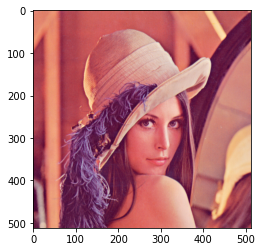

In [18]:
bgr = cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/lena-rgb.png',
                      flags=cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

ヒストグラムの可視化

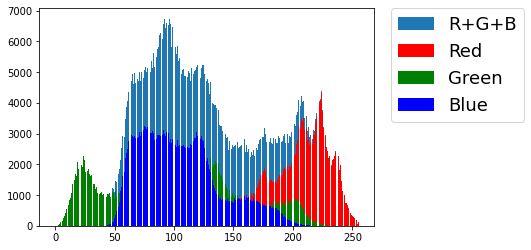

In [19]:
# R+G+B
hist_RGB, bins = np.histogram(a=rgb.flatten(), bins=256, range=[0, 256])
h = [h for h in range(len(hist_RGB))]
plt.bar(h, hist_RGB, label="R+G+B")
# R
hist_R, bins = np.histogram(a=rgb[:,:,0], bins=256, range=[0, 256])
plt.bar(h, hist_R, color="r", label="Red")
# G
hist_G, bins = np.histogram(a=rgb[:,:,1], bins=256, range=[0, 256])
plt.bar(h, hist_G, color="g", label="Green")
# B
hist_B, bins = np.histogram(a=rgb[:,:,2], bins=256, range=[0, 256])
plt.bar(h, hist_B, color="b", label="Blue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
           fontsize=18)
plt.show()

ヒストグラム均等化

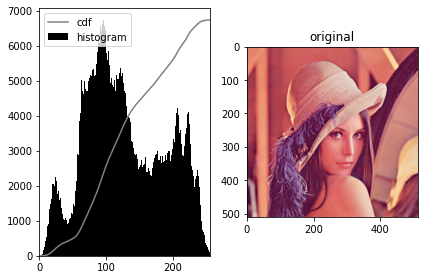

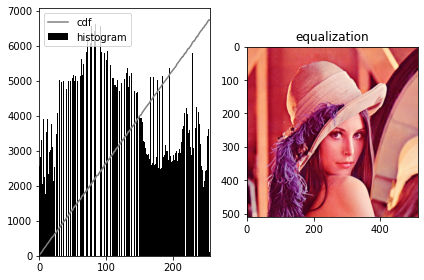

In [20]:
# bgr = cv2.imread(
#     "/content/drive/My Drive/DATASET/dataset/HistogramEqualization.png",
#     cv2.IMREAD_COLOR)
# rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

hist, bins = np.histogram(rgb, 256,[0,256])
# 階調変換関数を取得
cdf = hist.cumsum() # リスト順に累積したリストを返す
cdf_normalized = cdf * hist.max() / cdf.max()

# 均等化処理
cdf_m = np.ma.masked_equal(cdf, 0) # まずヒストグラム内の最小値を見つける(0を除く)
# 均等化の処理を計算
# 処理はすべてマスクされていない要素にだけ作用する
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# 計算結果配列から画素値を取り出す
img2 = cdf[rgb] # わからん。わかった!昔の人はすげーや。

# 均等化後のヒストグラム
hist, bins = np.histogram(img2, 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized2 = cdf * hist.max() / cdf.max()
# 比較表示
plt.subplot(121)
plt.plot(cdf_normalized, color = 'gray')
plt.hist(rgb.flatten(), 256, [0, 256], color='black')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')

plt.subplot(122)
plt.imshow(rgb)
plt.title("original")
plt.tight_layout()
plt.show()

plt.subplot(121)
plt.plot(cdf_normalized2, color = 'gray')
plt.hist(img2.flatten(), 256, [0, 256], color='black')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')

plt.subplot(122)
plt.imshow(img2)
plt.title("equalization")
plt.tight_layout()
plt.show()


ヒストグラムの可視化(均等化後)

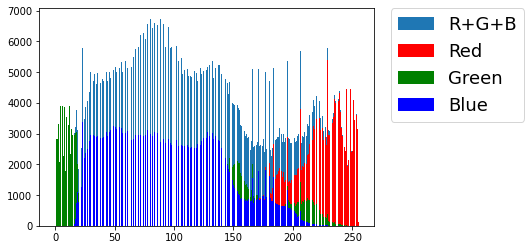

In [23]:
# R+G+B
hist_RGB, bins = np.histogram(a=img2.flatten(), bins=256, range=[0, 256])
h = [h for h in range(len(hist_RGB))]
plt.bar(h, hist_RGB, label="R+G+B")
# R
hist_R, bins = np.histogram(a=img2[:,:,0], bins=256, range=[0, 256])
plt.bar(h, hist_R, color="r", label="Red")
# G
hist_G, bins = np.histogram(a=img2[:,:,1], bins=256, range=[0, 256])
plt.bar(h, hist_G, color="g", label="Green")
# B
hist_B, bins = np.histogram(a=img2[:,:,2], bins=256, range=[0, 256])
plt.bar(h, hist_B, color="b", label="Blue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
           fontsize=18)
plt.show()